PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [ ]:
!pip install scikeras

In [ ]:
!pip install tensorflow

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import *
from sklearn.metrics import *
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.linear_model import Perceptron
import tensorflow as tf
from keras.optimizers import Adam,RMSprop
from imblearn.over_sampling import SMOTE
from scikeras.wrappers import KerasClassifier


#READ AND PREPROCESS THE DATA

In [ ]:
data=pd.read_csv("/content/forestfires (2).csv")

In [ ]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
data.drop('month',axis=1,inplace=True)
data.drop('day',axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data['size_category']=labelencoder.fit_transform(data['size_category'])
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data["size_category"].value_counts()


1    378
0    139
Name: size_category, dtype: int64

In [ ]:
data.shape

(517, 29)

In [ ]:
data.isna().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,0.731141
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

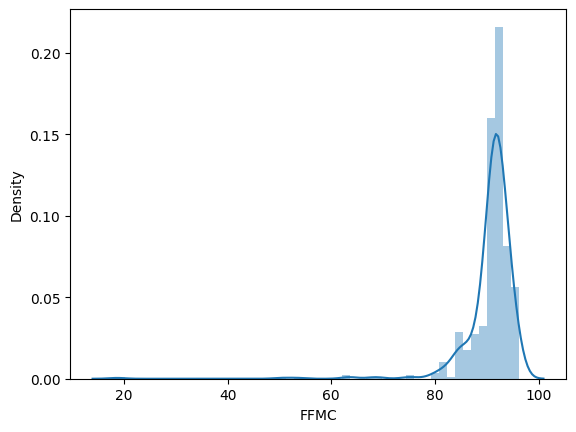

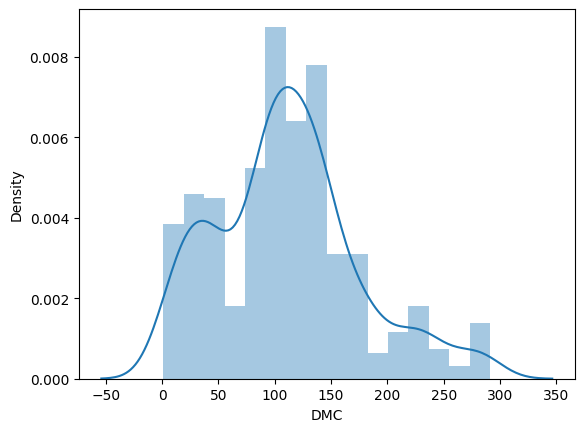

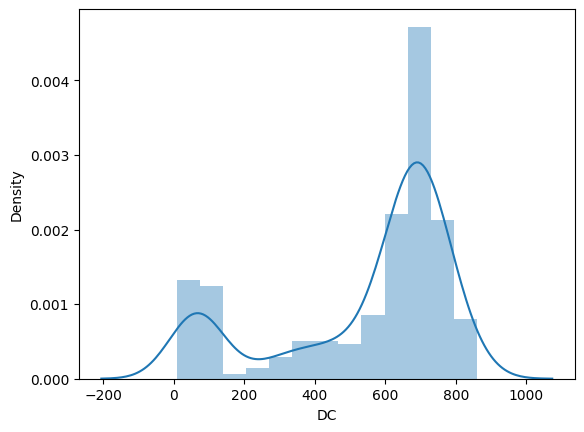

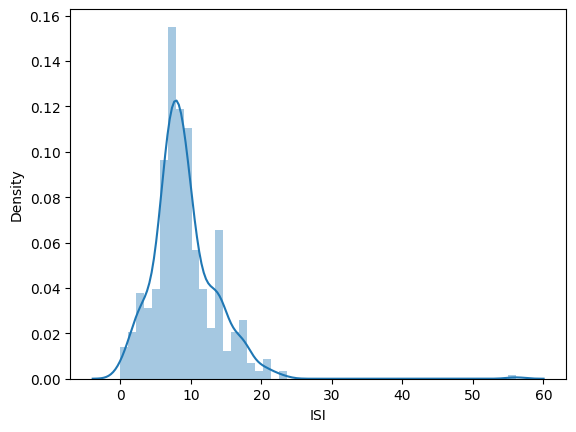

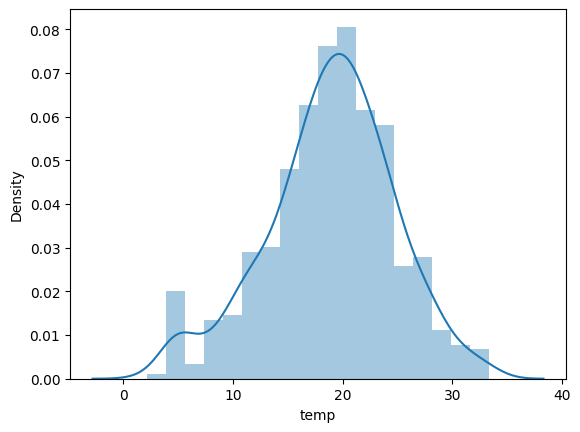

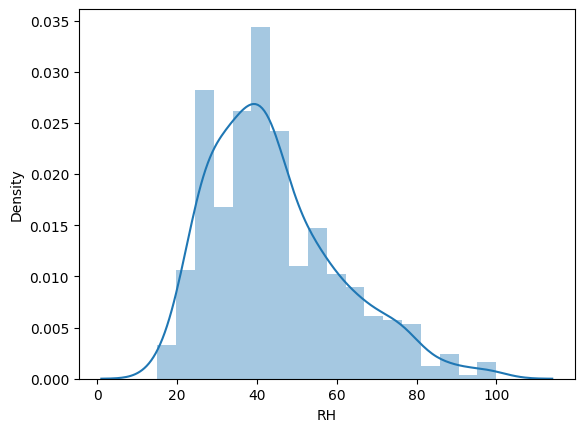

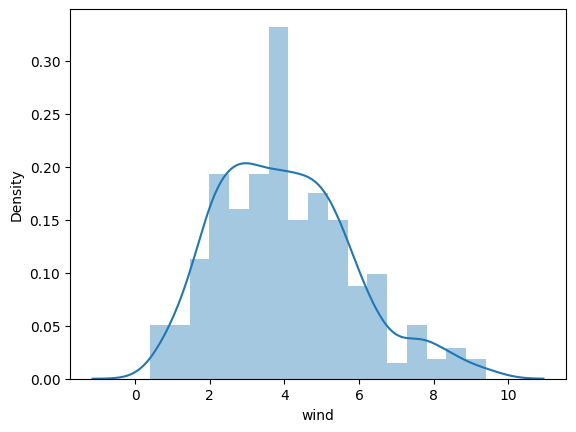

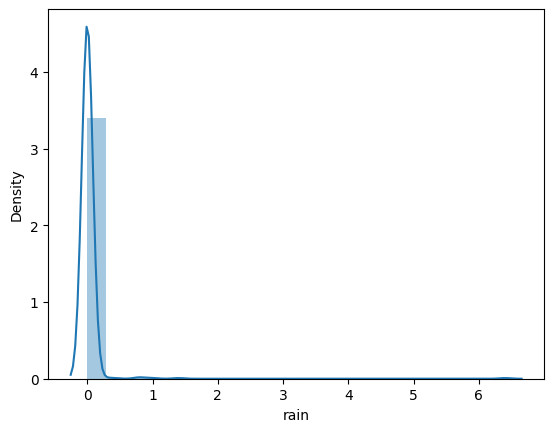

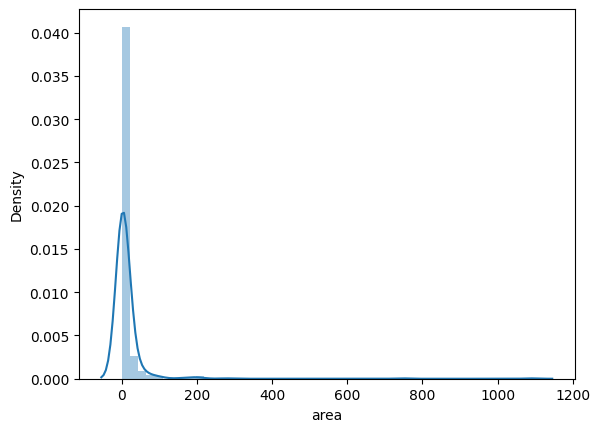

In [ ]:
columns=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
for i in columns:
  plt.figure()
  sns.distplot(data[i])

In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.fit_transform(x_test)


In [ ]:
X_train, X_test

(array([[0.92903226, 0.14849429, 0.09971678, ..., 0.        , 0.        ,
         0.        ],
        [0.9483871 , 0.35029422, 0.87750767, ..., 0.        , 0.        ,
         1.        ],
        [0.91096774, 0.17376255, 0.11128157, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.96258065, 0.16753202, 0.34198726, ..., 0.        , 0.        ,
         0.        ],
        [0.99612903, 0.5430945 , 0.73837621, ..., 0.        , 0.        ,
         0.        ],
        [0.94709677, 0.52440291, 0.76740618, ..., 0.        , 0.        ,
         0.        ]]),
 array([[0.88151659, 0.26969802, 0.79227854, ..., 0.        , 0.        ,
         1.        ],
        [0.8056872 , 0.37486984, 0.75544766, ..., 0.        , 0.        ,
         0.        ],
        [0.93364929, 0.36480389, 0.74715775, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.7535545 , 0.43838945, 0.80104216, ..., 0.        , 0.        ,
         1.        ],
        [0.4

In [ ]:
def create_model():
  model=Sequential()
  model.add(Dense(12,input_dim=28,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(lr=0.01)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

Hyper-parameter tuning for best batch size and epochs

In [ ]:
model=KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,30]
epochs=[50,100,150]
param_grid=dict(batch_size=batch_size,epochs=epochs)
gsv=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=gsv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[CV 1/5] END ..........batch_size=10, epochs=50;, score=0.740 total time=   5.9s


[CV 2/5] END ..........batch_size=10, epochs=50;, score=0.639 total time=   4.7s


[CV 3/5] END ..........batch_size=10, epochs=50;, score=0.736 total time=   4.0s


[CV 4/5] END ..........batch_size=10, epochs=50;, score=0.722 total time=   6.3s


[CV 5/5] END ..........batch_size=10, epochs=50;, score=0.764 total time=   4.3s


[CV 1/5] END .........batch_size=10, epochs=100;, score=0.740 total time=   6.3s


[CV 2/5] END .........batch_size=10, epochs=100;, score=0.639 total time=   7.4s


[CV 3/5] END .........batch_size=10, epochs=100;, score=0.778 total time=   6.5s


[CV 4/5] END .........batch_size=10, epochs=100;, score=0.736 total time=  11.8s


[CV 5/5] END .........batch_size=10, epochs=100;, score=0.764 total time=  11.4s


[CV 1/5] END .........batch_size=10, epochs=150;, score=0.767 total time=  10.2s


[CV 2/5] END .........batch_size=10, epochs=150;, score=0.639 total time=  11.3s


[CV 3/5] END .........batch_size=10, epochs=150;, score=0.806 total time=   9.8s


[CV 4/5] END .........batch_size=10, epochs=150;, score=0.778 total time=  11.4s


[CV 5/5] END .........batch_size=10, epochs=150;, score=0.847 total time=   8.9s


[CV 1/5] END ..........batch_size=20, epochs=50;, score=0.740 total time=   3.6s


[CV 2/5] END ..........batch_size=20, epochs=50;, score=0.639 total time=   3.6s


[CV 3/5] END ..........batch_size=20, epochs=50;, score=0.736 total time=   4.2s


[CV 4/5] END ..........batch_size=20, epochs=50;, score=0.722 total time=   3.7s


[CV 5/5] END ..........batch_size=20, epochs=50;, score=0.764 total time=   2.8s


[CV 1/5] END .........batch_size=20, epochs=100;, score=0.671 total time=   6.2s


[CV 2/5] END .........batch_size=20, epochs=100;, score=0.639 total time=   4.9s


[CV 3/5] END .........batch_size=20, epochs=100;, score=0.778 total time=   4.1s


[CV 4/5] END .........batch_size=20, epochs=100;, score=0.722 total time=   4.0s


[CV 5/5] END .........batch_size=20, epochs=100;, score=0.778 total time=   4.9s


[CV 1/5] END .........batch_size=20, epochs=150;, score=0.726 total time=   5.4s


[CV 2/5] END .........batch_size=20, epochs=150;, score=0.639 total time=  11.3s


[CV 3/5] END .........batch_size=20, epochs=150;, score=0.792 total time=   5.7s


[CV 4/5] END .........batch_size=20, epochs=150;, score=0.722 total time=   6.1s


[CV 5/5] END .........batch_size=20, epochs=150;, score=0.792 total time=   5.4s


[CV 1/5] END ..........batch_size=30, epochs=50;, score=0.767 total time=   3.9s


[CV 2/5] END ..........batch_size=30, epochs=50;, score=0.639 total time=   2.1s


[CV 3/5] END ..........batch_size=30, epochs=50;, score=0.736 total time=   2.2s


[CV 4/5] END ..........batch_size=30, epochs=50;, score=0.722 total time=   2.3s


[CV 5/5] END ..........batch_size=30, epochs=50;, score=0.764 total time=   2.3s


[CV 1/5] END .........batch_size=30, epochs=100;, score=0.767 total time=   4.6s


[CV 2/5] END .........batch_size=30, epochs=100;, score=0.639 total time=   3.6s


[CV 3/5] END .........batch_size=30, epochs=100;, score=0.736 total time=   3.6s


[CV 4/5] END .........batch_size=30, epochs=100;, score=0.736 total time=   4.1s


[CV 5/5] END .........batch_size=30, epochs=100;, score=0.764 total time=   3.6s


[CV 1/5] END .........batch_size=30, epochs=150;, score=0.699 total time=   6.2s


[CV 2/5] END .........batch_size=30, epochs=150;, score=0.639 total time=   4.7s


[CV 3/5] END .........batch_size=30, epochs=150;, score=0.778 total time=   6.1s


[CV 4/5] END .........batch_size=30, epochs=150;, score=0.736 total time=   6.3s


[CV 5/5] END .........batch_size=30, epochs=150;, score=0.764 total time=   6.1s


In [ ]:
result.best_score_,result.best_params_

(0.7673135464231354, {'batch_size': 10, 'epochs': 150})

Hyper-parameter training for learning and dropout rate

In [ ]:
def create_model(learning_rate,dropout_rate):
  model=Sequential()
  model.add(Dense(12,input_dim=28,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(lr=learning_rate)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [ ]:
model1=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50,verbose=0,learning_rate=[0.01,0.001,0.1],
dropout_rate=[0.2,0.1,0.02])
param_grid=dict(learning_rate=[0.01,0.001,0.1],dropout_rate=[0.2,0.1,0.02])
result=GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=5)
result1=result.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[CV 1/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.767 total time=   6.3s


[CV 2/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.639 total time=   7.1s


[CV 3/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.736 total time=   6.2s


[CV 4/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.722 total time=   4.4s


[CV 5/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.764 total time=   3.9s


[CV 1/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.685 total time=   3.8s


[CV 2/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.639 total time=   6.1s


[CV 3/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.736 total time=   6.2s


[CV 4/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.722 total time=   6.2s


[CV 5/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.764 total time=   7.1s


[CV 1/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.767 total time=   6.4s


[CV 2/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.639 total time=   6.3s


[CV 3/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.736 total time=   5.0s


[CV 4/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.722 total time=   6.2s


[CV 5/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.764 total time=   6.2s


[CV 1/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.740 total time=   6.2s


[CV 2/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.639 total time=   5.8s


[CV 3/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.736 total time=   6.2s


[CV 4/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.722 total time=   6.2s


[CV 5/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.764 total time=   6.2s


[CV 1/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.685 total time=   6.2s


[CV 2/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.639 total time=   6.2s


[CV 3/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.736 total time=   6.2s


[CV 4/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.722 total time=   6.2s


[CV 5/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.750 total time=   4.5s


[CV 1/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.699 total time=   4.4s


[CV 2/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.639 total time=   6.7s


[CV 3/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.736 total time=   4.3s


[CV 4/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.722 total time=   6.2s


[CV 5/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.764 total time=   4.7s


[CV 1/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.767 total time=   3.8s


[CV 2/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.639 total time=   3.7s
[CV 3/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.736 total time=   4.6s


[CV 4/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.722 total time=   7.2s


[CV 5/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.764 total time=   6.2s


[CV 1/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.685 total time=   6.2s


[CV 2/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.639 total time=   6.2s


[CV 3/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.750 total time=   6.2s


[CV 4/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.722 total time=   6.2s


[CV 5/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.764 total time=   3.8s


[CV 1/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.712 total time=   3.8s


[CV 2/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.639 total time=   4.6s


[CV 3/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.736 total time=   6.2s


[CV 4/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.736 total time=   6.2s


[CV 5/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.764 total time=   3.8s


In [ ]:
result1.best_params_,result1.best_score_

({'dropout_rate': 0.2, 'learning_rate': 0.01}, 0.7256468797564688)

tuning for activation fuction and kernal initializer


In [ ]:
def create_model(activation_Function,init):
  model=Sequential()
  model.add(Dense(12,input_dim=28,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer=init,activation='sigmoid'))
  adam=Adam(lr=0.01)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [ ]:
model=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50,verbose=0,activation_Function=['relu','tanh','softmax','linear'],
init=['zero','uniform','normal'])
param_grid=dict(activation_Function=['relu','tanh','softmax','linear'],init=['zero','uniform','normal'])
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[CV 1/5] END activation_Function=relu, init=zero;, score=0.767 total time=   3.9s


[CV 2/5] END activation_Function=relu, init=zero;, score=0.639 total time=   6.2s


[CV 3/5] END activation_Function=relu, init=zero;, score=0.736 total time=   6.2s


[CV 4/5] END activation_Function=relu, init=zero;, score=0.722 total time=   6.2s


[CV 5/5] END activation_Function=relu, init=zero;, score=0.764 total time=   6.2s


[CV 1/5] END activation_Function=relu, init=uniform;, score=0.767 total time=   6.2s


[CV 2/5] END activation_Function=relu, init=uniform;, score=0.639 total time=   3.8s


[CV 3/5] END activation_Function=relu, init=uniform;, score=0.736 total time=   3.8s


[CV 4/5] END activation_Function=relu, init=uniform;, score=0.722 total time=   4.7s


[CV 5/5] END activation_Function=relu, init=uniform;, score=0.764 total time=   6.2s


[CV 1/5] END activation_Function=relu, init=normal;, score=0.685 total time=   6.2s
[CV 2/5] END activation_Function=relu, init=normal;, score=0.653 total time=   4.9s


[CV 3/5] END activation_Function=relu, init=normal;, score=0.736 total time=   5.3s


[CV 4/5] END activation_Function=relu, init=normal;, score=0.722 total time=   6.5s


[CV 5/5] END activation_Function=relu, init=normal;, score=0.764 total time=   5.5s


[CV 1/5] END activation_Function=tanh, init=zero;, score=0.767 total time=   4.6s


[CV 2/5] END activation_Function=tanh, init=zero;, score=0.639 total time=   6.2s


[CV 3/5] END activation_Function=tanh, init=zero;, score=0.736 total time=   6.4s


[CV 4/5] END activation_Function=tanh, init=zero;, score=0.722 total time=   6.3s


[CV 5/5] END activation_Function=tanh, init=zero;, score=0.764 total time=   5.0s


[CV 1/5] END activation_Function=tanh, init=uniform;, score=0.685 total time=   4.3s


[CV 2/5] END activation_Function=tanh, init=uniform;, score=0.694 total time=   4.7s


[CV 3/5] END activation_Function=tanh, init=uniform;, score=0.792 total time=   4.5s


[CV 4/5] END activation_Function=tanh, init=uniform;, score=0.722 total time=   3.8s


[CV 5/5] END activation_Function=tanh, init=uniform;, score=0.778 total time=   6.2s


[CV 1/5] END activation_Function=tanh, init=normal;, score=0.685 total time=   3.9s
[CV 2/5] END activation_Function=tanh, init=normal;, score=0.694 total time=   7.0s


[CV 3/5] END activation_Function=tanh, init=normal;, score=0.792 total time=   8.8s


[CV 4/5] END activation_Function=tanh, init=normal;, score=0.722 total time=   7.4s


[CV 5/5] END activation_Function=tanh, init=normal;, score=0.764 total time=   6.8s


[CV 1/5] END activation_Function=softmax, init=zero;, score=0.767 total time=  12.4s


[CV 2/5] END activation_Function=softmax, init=zero;, score=0.639 total time=   4.7s


[CV 3/5] END activation_Function=softmax, init=zero;, score=0.736 total time=   3.8s


[CV 4/5] END activation_Function=softmax, init=zero;, score=0.722 total time=   3.8s


[CV 5/5] END activation_Function=softmax, init=zero;, score=0.764 total time=   4.7s


[CV 1/5] END activation_Function=softmax, init=uniform;, score=0.767 total time=   6.2s


[CV 2/5] END activation_Function=softmax, init=uniform;, score=0.639 total time=   6.2s


[CV 3/5] END activation_Function=softmax, init=uniform;, score=0.736 total time=   6.2s


[CV 4/5] END activation_Function=softmax, init=uniform;, score=0.722 total time=   4.3s


[CV 5/5] END activation_Function=softmax, init=uniform;, score=0.764 total time=   6.5s


[CV 1/5] END activation_Function=softmax, init=normal;, score=0.767 total time=   6.2s


[CV 2/5] END activation_Function=softmax, init=normal;, score=0.639 total time=   6.2s


[CV 3/5] END activation_Function=softmax, init=normal;, score=0.736 total time=   6.2s


[CV 4/5] END activation_Function=softmax, init=normal;, score=0.722 total time=   6.2s


[CV 5/5] END activation_Function=softmax, init=normal;, score=0.764 total time=   6.2s


[CV 1/5] END activation_Function=linear, init=zero;, score=0.767 total time=   3.8s


[CV 2/5] END activation_Function=linear, init=zero;, score=0.639 total time=   7.7s


[CV 3/5] END activation_Function=linear, init=zero;, score=0.736 total time=   6.9s


[CV 4/5] END activation_Function=linear, init=zero;, score=0.722 total time=   4.7s


[CV 5/5] END activation_Function=linear, init=zero;, score=0.764 total time=   6.7s


[CV 1/5] END activation_Function=linear, init=uniform;, score=0.685 total time=   6.3s
[CV 2/5] END activation_Function=linear, init=uniform;, score=0.708 total time=   4.9s


[CV 3/5] END activation_Function=linear, init=uniform;, score=0.792 total time=   7.8s


[CV 4/5] END activation_Function=linear, init=uniform;, score=0.722 total time=   6.2s


[CV 5/5] END activation_Function=linear, init=uniform;, score=0.750 total time=   4.2s


[CV 1/5] END activation_Function=linear, init=normal;, score=0.685 total time=   6.6s


[CV 2/5] END activation_Function=linear, init=normal;, score=0.694 total time=   6.7s


[CV 3/5] END activation_Function=linear, init=normal;, score=0.792 total time=   3.9s


[CV 4/5] END activation_Function=linear, init=normal;, score=0.722 total time=   6.5s


[CV 5/5] END activation_Function=linear, init=normal;, score=0.778 total time=   4.7s


In [ ]:
result.best_params_,result.best_score_

({'activation_Function': 'tanh', 'init': 'uniform'}, 0.7342085235920852)

TUNING FOR NEURONS IN HIDDEN LAYERS

In [ ]:
def create_model(neuron1,neuron2):
  model=Sequential()
  model.add(Dense(neuron1,input_dim=28,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0,2))
  model.add(Dense(neuron2,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(lr=0.01)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model


In [ ]:
model=KerasClassifier(build_fn=create_model,batch_size=30,epochs=10,verbose=0,neuron1=[12,10,9],neuron2=[8,6,4])
param_grid=dict(neuron1=[12,10,9],neuron2=[8,6,4])
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[CV 1/5] END .............neuron1=12, neuron2=8;, score=0.767 total time=   1.4s


[CV 2/5] END .............neuron1=12, neuron2=8;, score=0.639 total time=   2.1s


[CV 3/5] END .............neuron1=12, neuron2=8;, score=0.736 total time=   1.5s


[CV 4/5] END .............neuron1=12, neuron2=8;, score=0.722 total time=   1.3s


[CV 5/5] END .............neuron1=12, neuron2=8;, score=0.764 total time=   1.4s


[CV 1/5] END .............neuron1=12, neuron2=6;, score=0.767 total time=   1.4s


[CV 2/5] END .............neuron1=12, neuron2=6;, score=0.639 total time=   1.3s


[CV 3/5] END .............neuron1=12, neuron2=6;, score=0.736 total time=   1.3s


[CV 4/5] END .............neuron1=12, neuron2=6;, score=0.722 total time=   1.3s


[CV 5/5] END .............neuron1=12, neuron2=6;, score=0.764 total time=   1.4s


[CV 1/5] END .............neuron1=12, neuron2=4;, score=0.767 total time=   2.1s


[CV 2/5] END .............neuron1=12, neuron2=4;, score=0.639 total time=   1.3s


[CV 3/5] END .............neuron1=12, neuron2=4;, score=0.736 total time=   1.3s


[CV 4/5] END .............neuron1=12, neuron2=4;, score=0.722 total time=   1.3s


[CV 5/5] END .............neuron1=12, neuron2=4;, score=0.764 total time=   1.3s


[CV 1/5] END .............neuron1=10, neuron2=8;, score=0.767 total time=   1.4s


[CV 2/5] END .............neuron1=10, neuron2=8;, score=0.639 total time=   1.2s


[CV 3/5] END .............neuron1=10, neuron2=8;, score=0.736 total time=   1.9s


[CV 4/5] END .............neuron1=10, neuron2=8;, score=0.722 total time=   2.7s


[CV 5/5] END .............neuron1=10, neuron2=8;, score=0.764 total time=   1.4s


[CV 1/5] END .............neuron1=10, neuron2=6;, score=0.767 total time=   2.7s


[CV 2/5] END .............neuron1=10, neuron2=6;, score=0.639 total time=   1.4s
[CV 3/5] END .............neuron1=10, neuron2=6;, score=0.736 total time=   1.3s


[CV 4/5] END .............neuron1=10, neuron2=6;, score=0.722 total time=   3.2s


[CV 5/5] END .............neuron1=10, neuron2=6;, score=0.764 total time=   2.3s


[CV 1/5] END .............neuron1=10, neuron2=4;, score=0.767 total time=   1.5s


[CV 2/5] END .............neuron1=10, neuron2=4;, score=0.639 total time=   1.4s


[CV 3/5] END .............neuron1=10, neuron2=4;, score=0.736 total time=   1.4s


[CV 4/5] END .............neuron1=10, neuron2=4;, score=0.722 total time=   1.3s


[CV 5/5] END .............neuron1=10, neuron2=4;, score=0.764 total time=   1.3s


[CV 1/5] END ..............neuron1=9, neuron2=8;, score=0.767 total time=   1.4s


[CV 2/5] END ..............neuron1=9, neuron2=8;, score=0.639 total time=   1.4s


[CV 3/5] END ..............neuron1=9, neuron2=8;, score=0.736 total time=   2.1s


[CV 4/5] END ..............neuron1=9, neuron2=8;, score=0.722 total time=   1.5s


[CV 5/5] END ..............neuron1=9, neuron2=8;, score=0.764 total time=   1.4s


[CV 1/5] END ..............neuron1=9, neuron2=6;, score=0.767 total time=   1.4s


[CV 2/5] END ..............neuron1=9, neuron2=6;, score=0.639 total time=   1.4s


[CV 3/5] END ..............neuron1=9, neuron2=6;, score=0.736 total time=   1.4s


[CV 4/5] END ..............neuron1=9, neuron2=6;, score=0.722 total time=   1.3s


[CV 5/5] END ..............neuron1=9, neuron2=6;, score=0.764 total time=   1.4s


[CV 1/5] END ..............neuron1=9, neuron2=4;, score=0.767 total time=   1.5s


[CV 2/5] END ..............neuron1=9, neuron2=4;, score=0.639 total time=   2.1s


[CV 3/5] END ..............neuron1=9, neuron2=4;, score=0.736 total time=   1.4s


[CV 4/5] END ..............neuron1=9, neuron2=4;, score=0.722 total time=   1.3s


[CV 5/5] END ..............neuron1=9, neuron2=4;, score=0.764 total time=   1.3s


In [ ]:
result.best_params_,result.best_score_

({'neuron1': 12, 'neuron2': 8}, 0.7256468797564688)

#MODEL WITH THE BEST HYPER-PARAMETERS

In [ ]:
def create_model():
  model=Sequential()
  model.add(Dense(12,input_dim=28,kernel_initializer='normal',activation='linear'))
  model.add(Dropout(0.1))
  model.add(Dense(8,kernel_initializer='normal',activation='linear'))
  model.add(Dropout(0.1))
  model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
  adam=Adam(lr=0.1)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model


In [ ]:
model=KerasClassifier(build_fn=create_model,batch_size=10,epochs=150)
model.fit(X_train,y_train)

Epoch 1/150
37/37 [==============================] - 1s 2ms/step - loss: 0.6841 - accuracy: 0.7202
Epoch 2/150
37/37 [==============================] - 0s 3ms/step - loss: 0.6462 - accuracy: 0.7258
Epoch 3/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5961 - accuracy: 0.7258
Epoch 4/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.7258
Epoch 5/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5922 - accuracy: 0.7258
Epoch 6/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5881 - accuracy: 0.7258
Epoch 7/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5855 - accuracy: 0.7258
Epoch 8/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5874 - accuracy: 0.7258
Epoch 9/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.7258
Epoch 10/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.7258
Epoch 11/

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x792b945aeef0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=150
	class_weight=None
)

In [ ]:
pred=model.predict(X_train)

37/37 [==============================] - 0s 3ms/step


In [ ]:
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        99
           1       0.97      1.00      0.99       262

    accuracy                           0.98       361
   macro avg       0.99      0.96      0.98       361
weighted avg       0.98      0.98      0.98       361



In [ ]:
pred_test=model.predict(X_test)

16/16 [==============================] - 0s 4ms/step


In [ ]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        40
           1       0.97      0.92      0.95       116

    accuracy                           0.92       156
   macro avg       0.89      0.92      0.90       156
weighted avg       0.93      0.92      0.92       156

